In [68]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
# import matplotlib and set inline for jupyter notebook
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
sns.set(style="white", color_codes=True)

# Relationship
1. Scatter plot using Matplotlib
2. Marginal Histogram
3. Scatter plot using Seaborn
4. Pair Plot in Seaborn
5. Heat Map


In [69]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()

# Build a DataFrame for iris dataset
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target
iris_df["species"] = iris_df["target"].map(
    {0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]}
)

# Display the first 10 rows of the DataFrame
iris_df.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
5       0  setosa  
6       0  setosa  
7       0  setosa  
8       0  setosa  
9       0  setosa

In [70]:
# Let's see how many examples we have of each species
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# 1. Scatter Plot

Text(0, 0.5, 'sepal width (cm)')

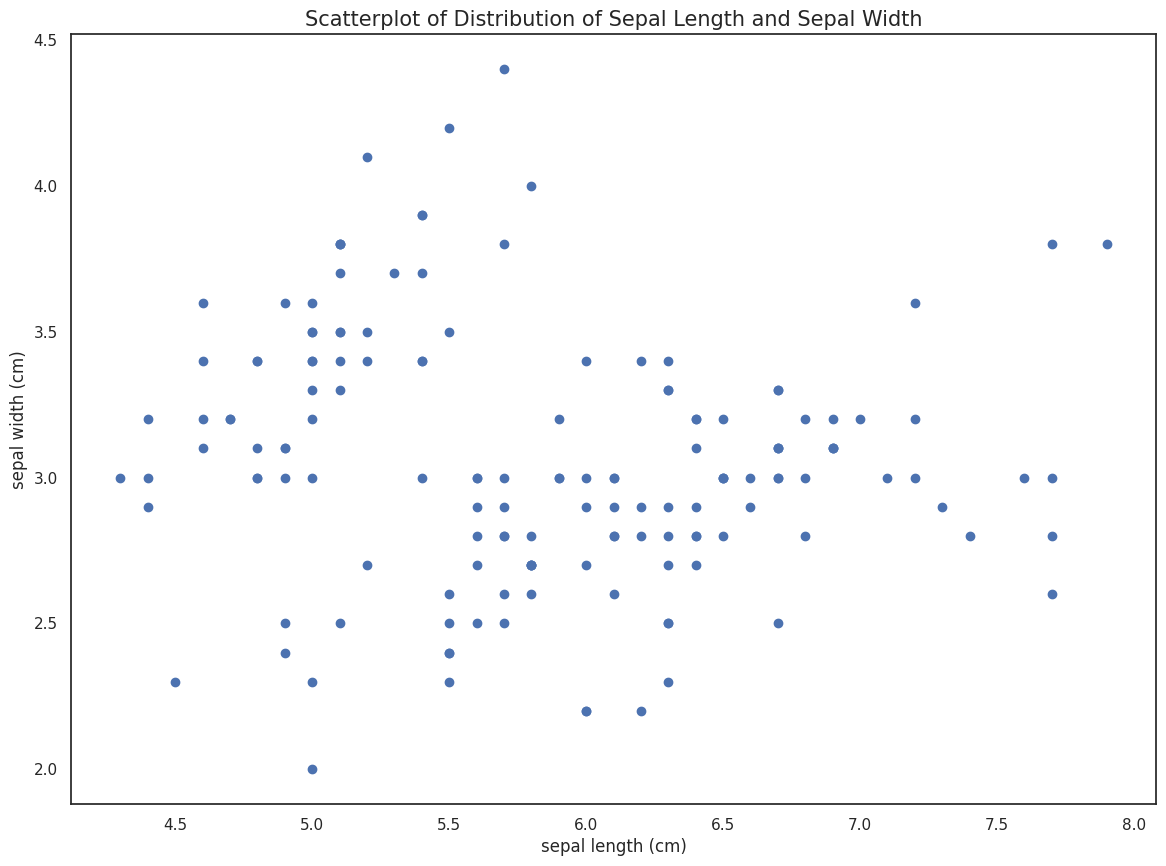

In [71]:
#scatter plot of distribution of sepal length and sepal width

fig = plt.figure(figsize=(14,10))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.title('Scatterplot of Distribution of Sepal Length and Sepal Width', fontsize=15)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# 2. Marginal Histogram

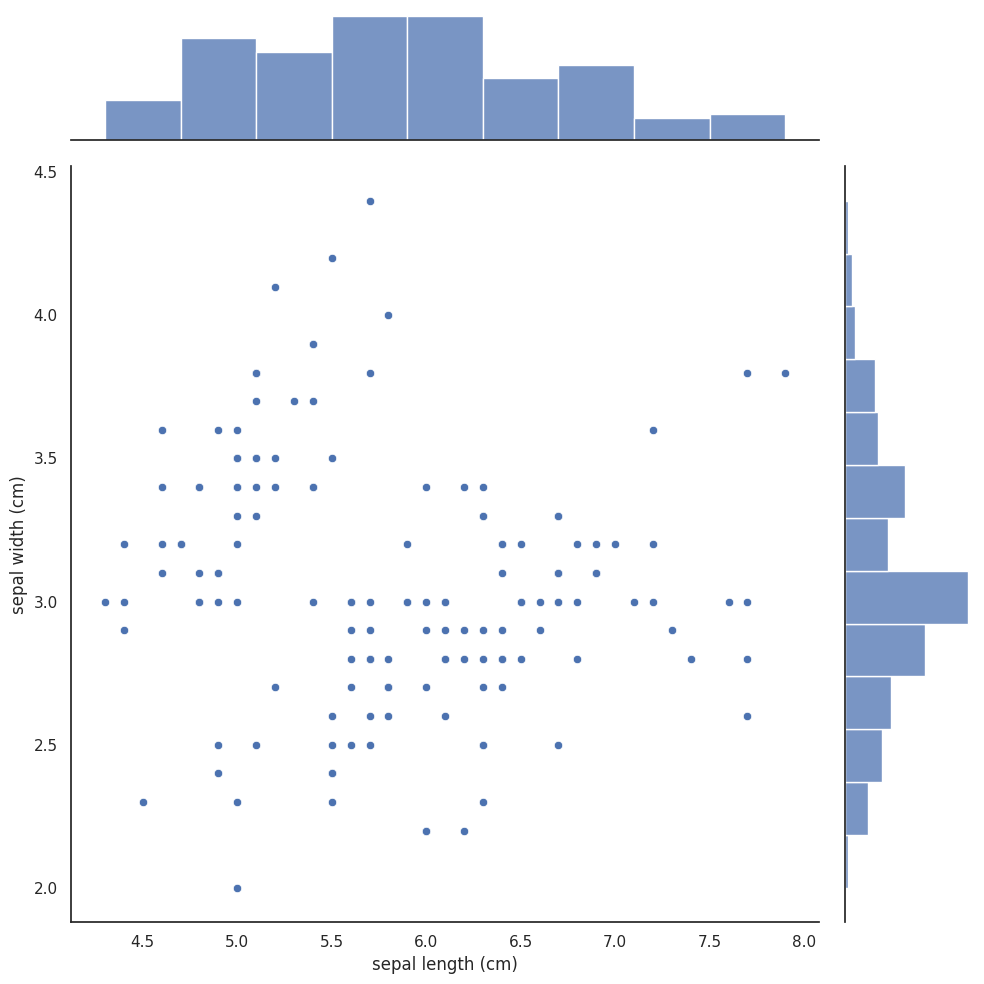

In [72]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
p = sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=iris_df, height=10)

# Display the plot
plt.show()

# 3. Scatter plot using Seaborn

Text(0.5, 1.0, 'Scatterplot with Seaborn')

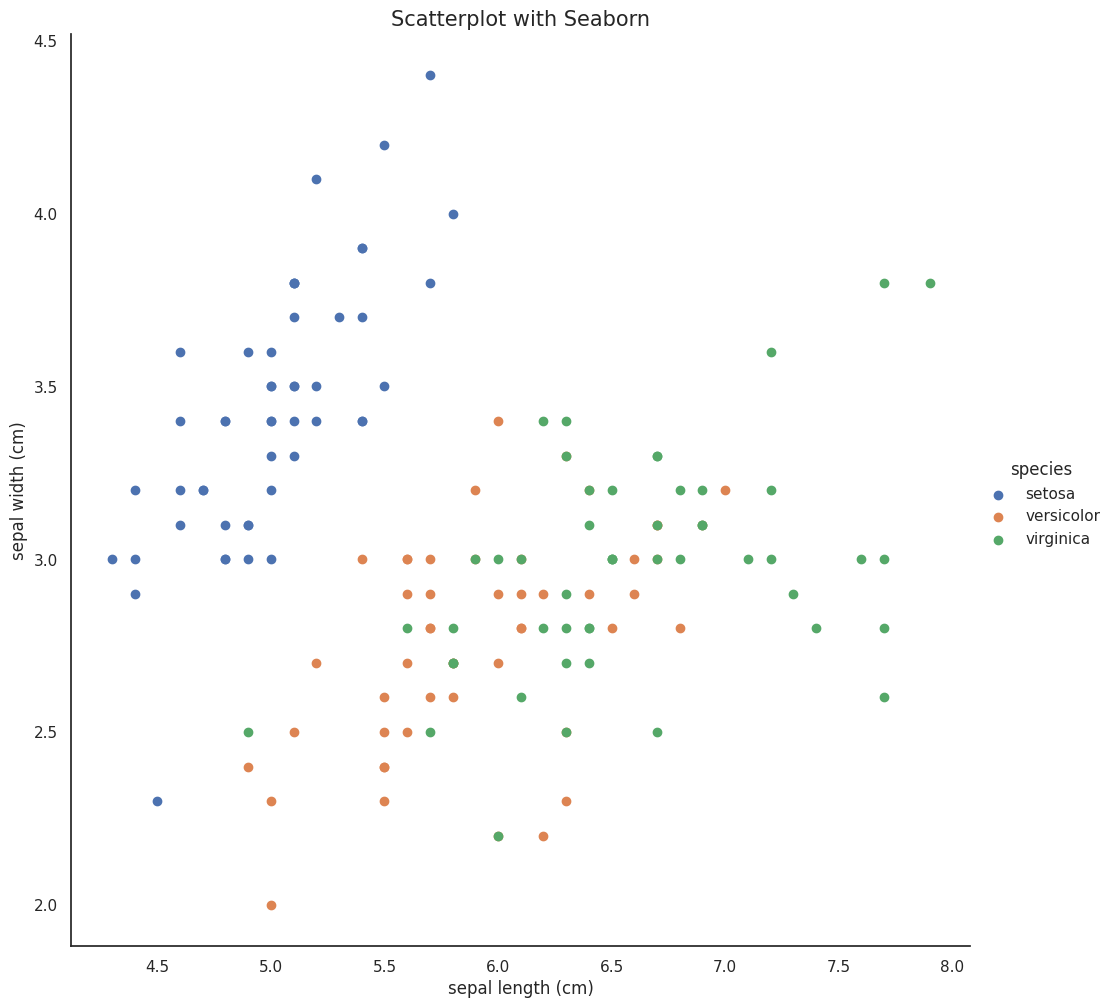

In [73]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris_df, hue='species', height=10) \
   .map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
   .add_legend()
plt.title('Scatterplot with Seaborn', fontsize=15)

# 4. Pair plot

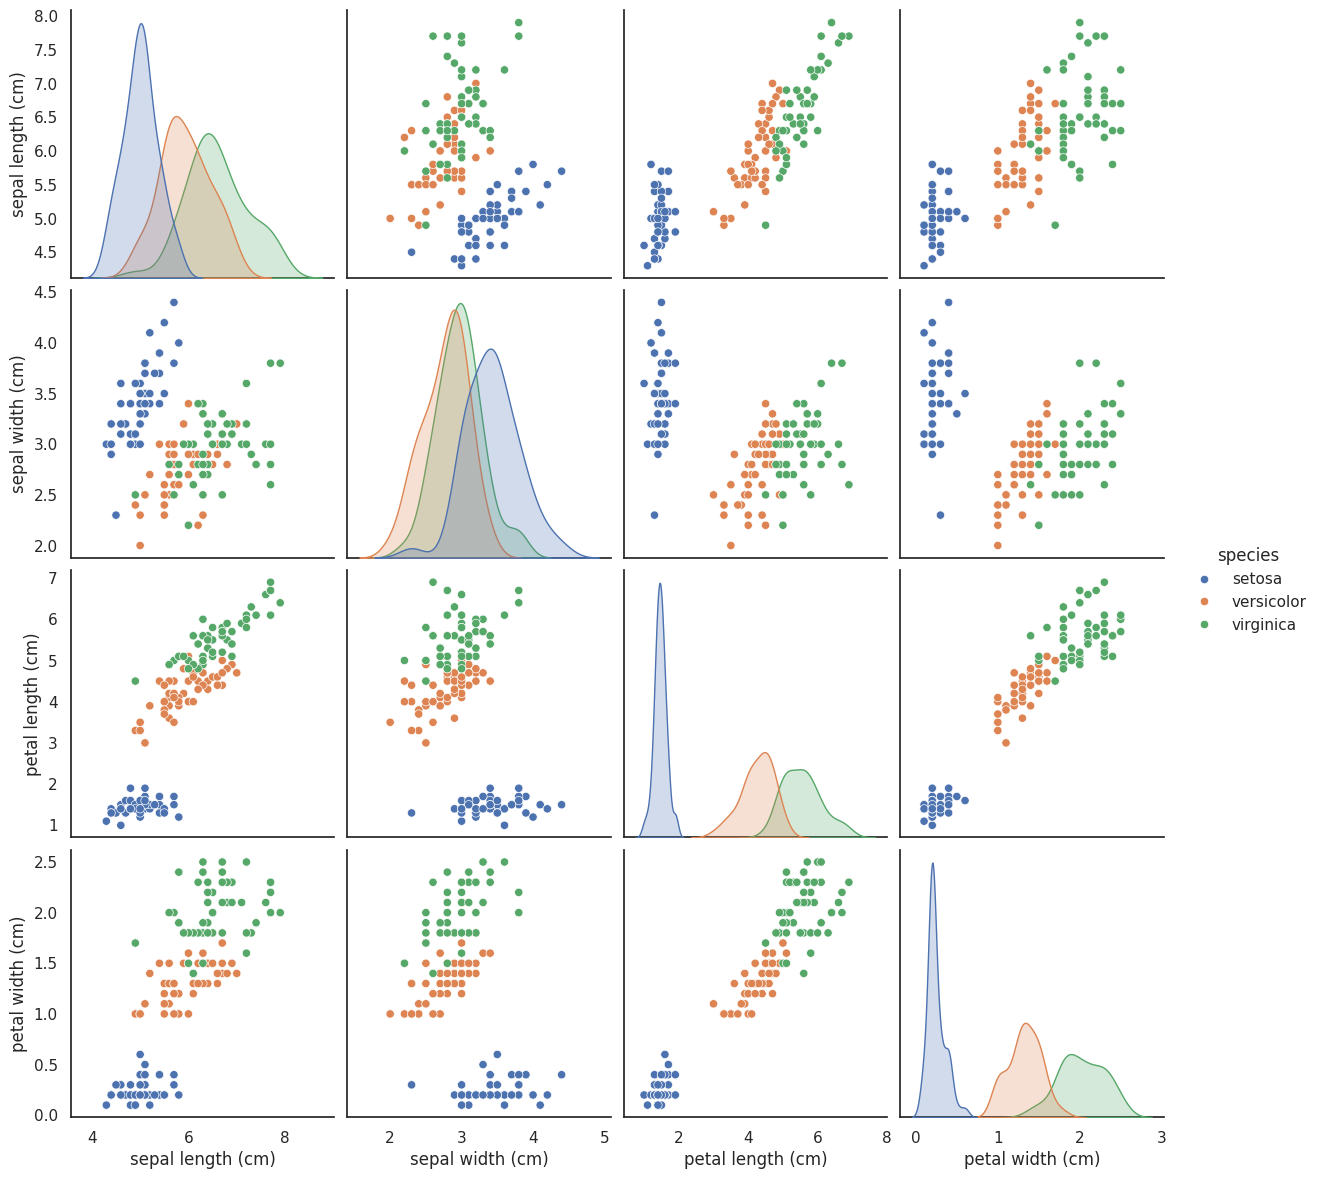

In [74]:
# Another useful seaborn plot is the pair plot, 
# which shows the bivariate relationship between each pair of features. 
# From the pair plot, we'll see that the Iris-setosa species is separated 
# from the other two across all feature combinations
sns.pairplot(iris_df.drop("target", axis=1), hue="species", height=3)

# 5. Heat map


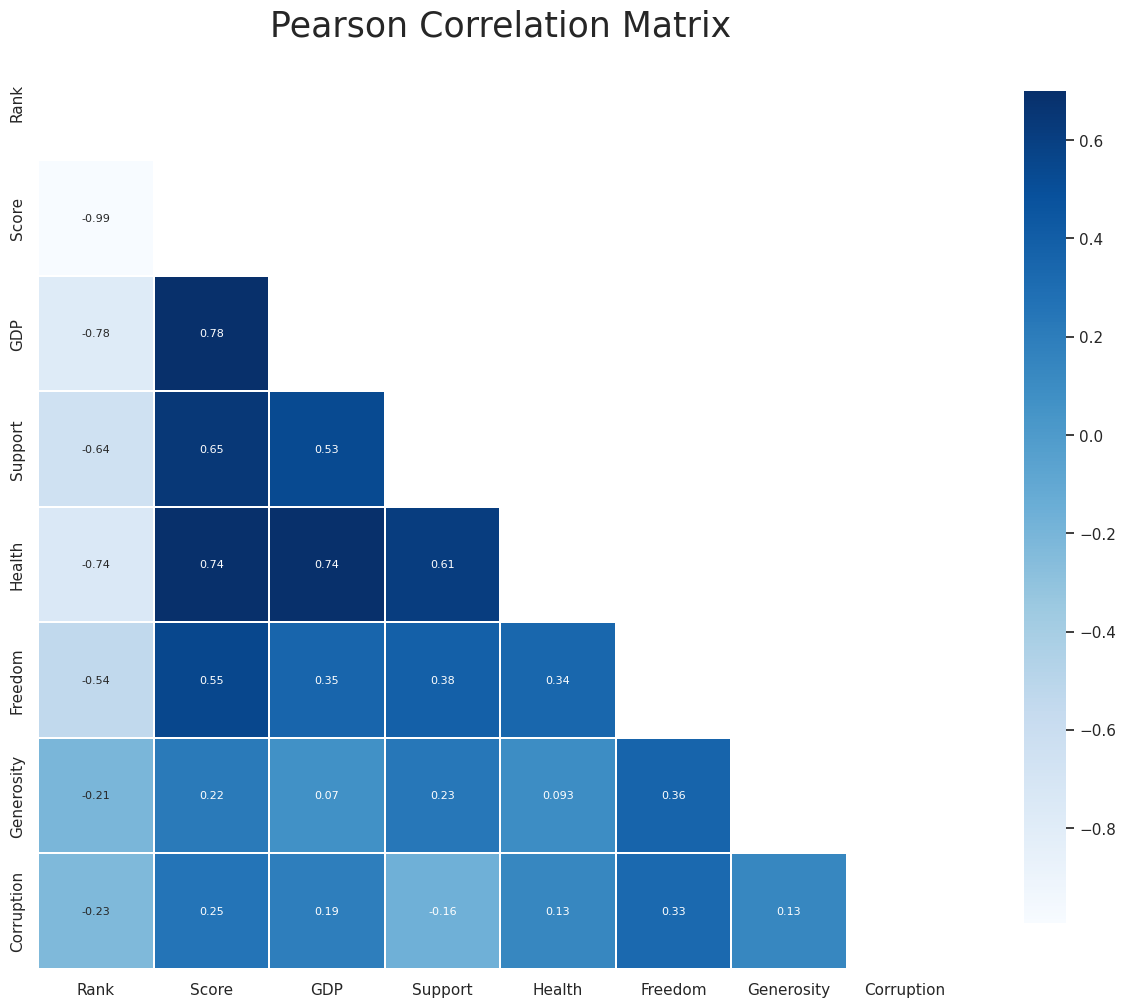

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
happy = pd.read_csv("happiness_rank.csv")

# Define columns for correlation analysis
usecols = [
    "Rank",
    "Score",
    "GDP",
    "Support",
    "Health",
    "Freedom",
    "Generosity",
    "Corruption",
]

# Remove non-numeric columns from usecols if necessary
numeric_cols = [col for col in usecols if np.issubdtype(happy[col].dtype, np.number)]

# Compute correlation matrix
mask = np.zeros_like(happy[numeric_cols].corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(16, 12))
plt.title("Pearson Correlation Matrix", fontsize=25)
sns.heatmap(
    happy[numeric_cols].corr(),
    linewidths=0.25,
    vmax=0.7,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9},
)

plt.show()

# Deviation plots
6. Line Chart

7. Area Chart

8. Stack Area Chart

9. Area Chart Unstacked

In [76]:
# Build data frame from inputted data
data = pd.DataFrame(data = {'Month': ['Jan', 'Feb', 'March', 'April','May','June',
                                      'July', 'Aug', 'Sept', 'Oct','Nov','Dec'],
 'All Views': [728820, 862775, 1001285,817075,973996,877365,
              539134, 978768, 1792495, 569553, 989850, 1012303],
 'Internal Views': [374872, 466159, 578368,530037,608158,543964,
                   345293, 485921, 843923, 284741, 494991, 472819],
 'External Views': [260911, 301914,310423,197089,237425,226267,
                   193841, 492847, 948572, 284712, 494859, 539484]})
data.to_csv('Views.csv')
data

Month  All Views  Internal Views  External Views
0     Jan     728820          374872          260911
1     Feb     862775          466159          301914
2   March    1001285          578368          310423
3   April     817075          530037          197089
4     May     973996          608158          237425
5    June     877365          543964          226267
6    July     539134          345293          193841
7     Aug     978768          485921          492847
8    Sept    1792495          843923          948572
9     Oct     569553          284741          284712
10    Nov     989850          494991          494859
11    Dec    1012303          472819          539484

# 6. Line Chart

Text(0.5, 1.0, 'Line Chart of All Views')

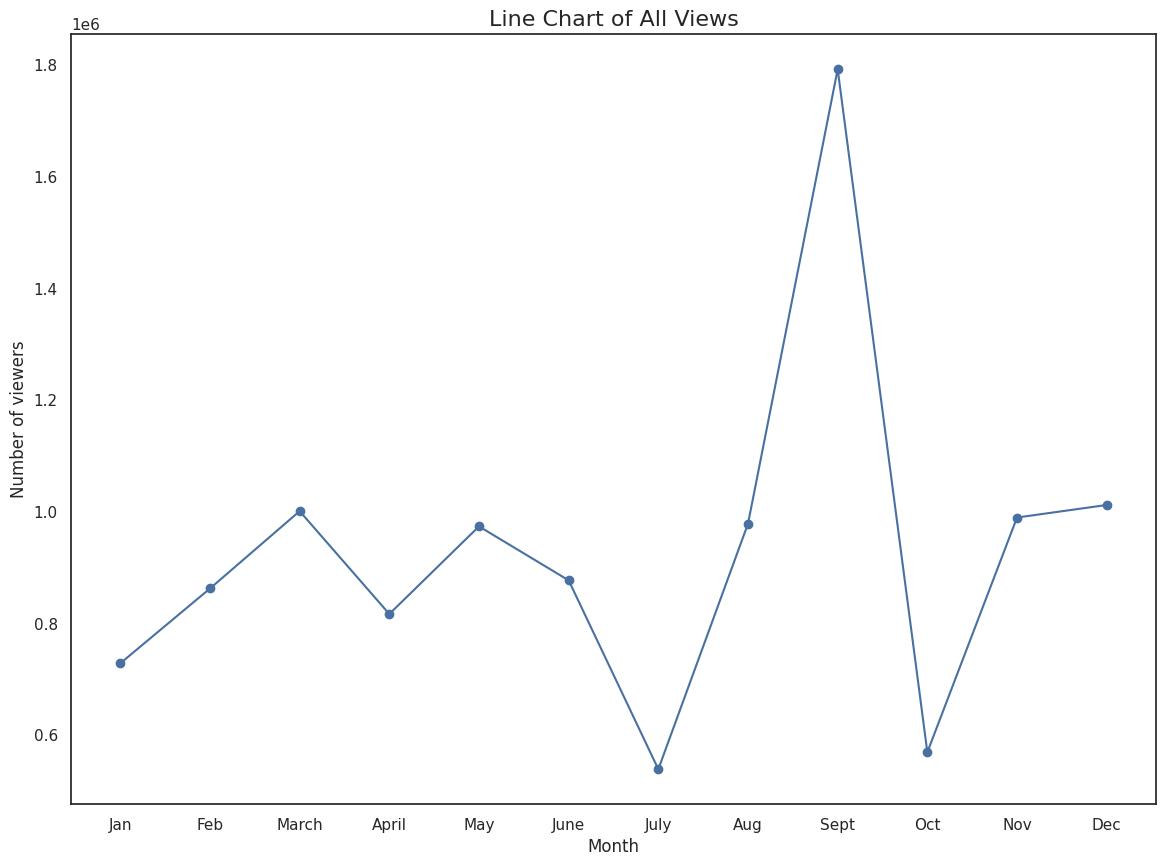

In [77]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.plot(data['Month'], data['All Views'], color='#4870a0', marker='o')

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Line Chart of All Views', fontsize = 16)


# 7. Area Chart


Text(0.5, 1.0, 'Area Chart of External Views')

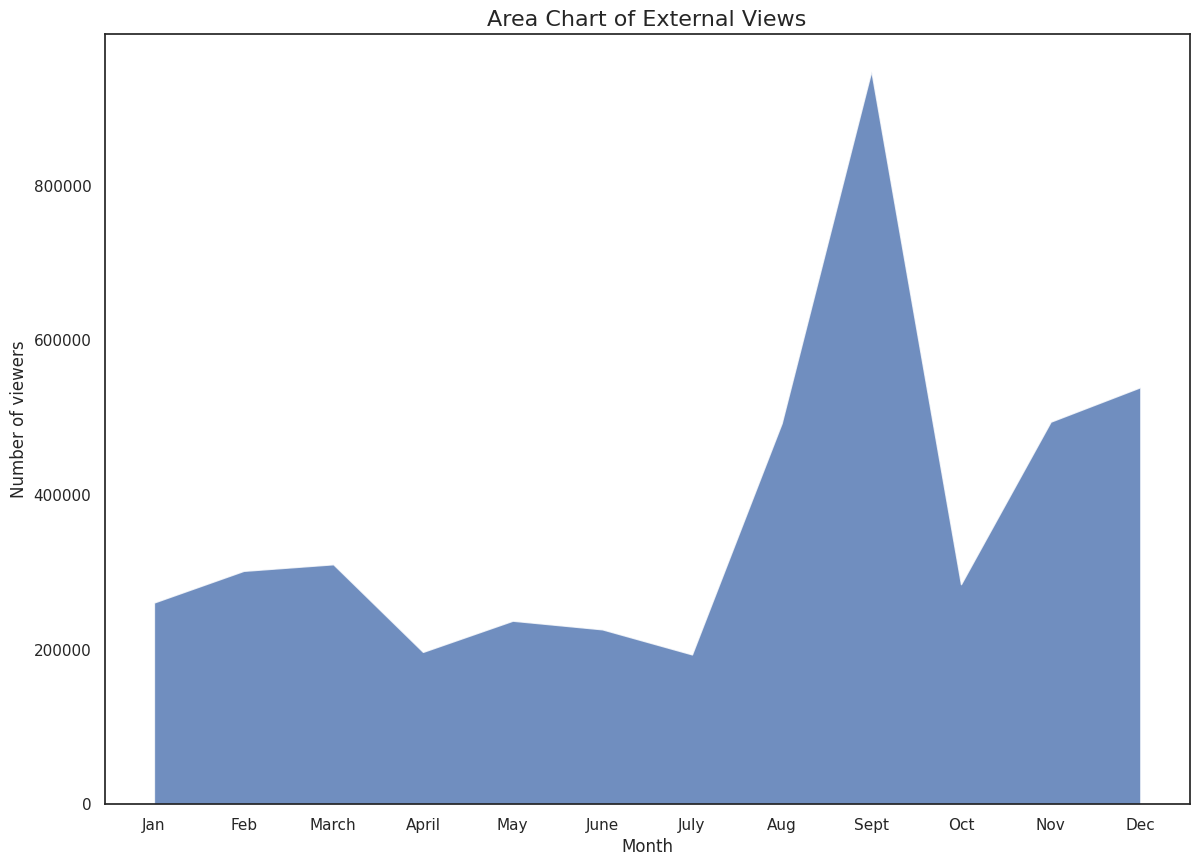

In [78]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['External Views'], alpha=0.8)

# set label and title for the plot
plt.xlabel('Month')
plt.ylabel('Number of viewers')
plt.title('Area Chart of External Views', fontsize = 16)


# 8. Stack Area Chart

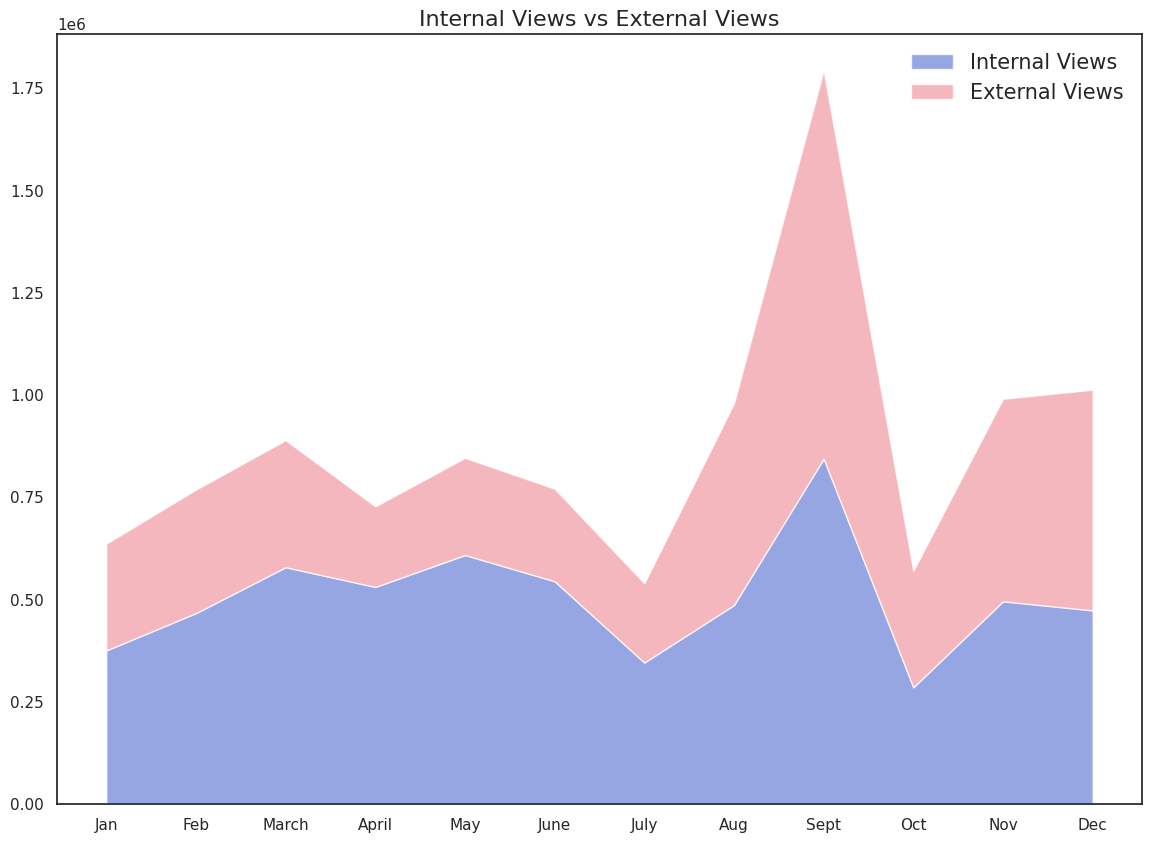

In [79]:
# instanciate the figure
fig = plt.figure(figsize = (14, 10))


# plot the data
plt.stackplot(data['Month'], data['Internal Views'], data['External Views'],
              alpha=0.75,
              colors=['#7289da','#f29fa9'],
            labels=['Internal Views', 'External Views'])


# set a title and a legend
plt.title('Internal Views vs External Views', fontsize=16)
plt.legend(fontsize=15)

# 9. Area Chart Unstacked


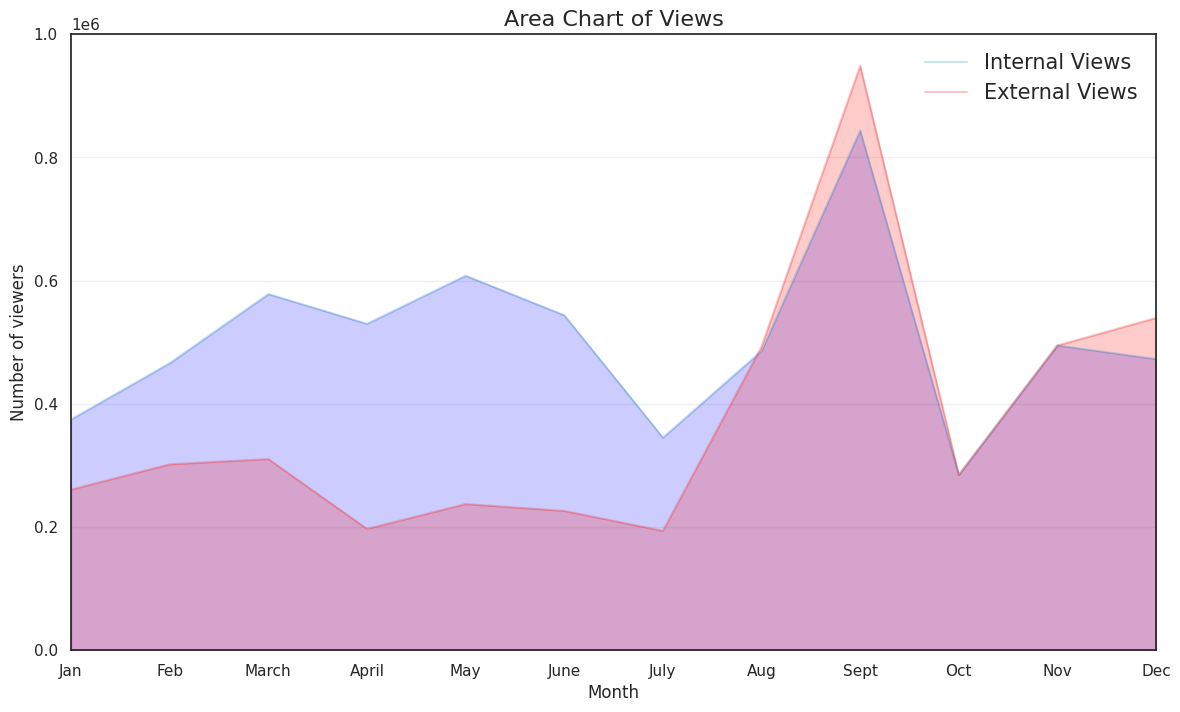

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create x as index and y as columns to plot
x = data.index
y1 = data["Internal Views"]
y2 = data["External Views"]

# Instantiate the figure
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot()

# Plot the data
ax.plot(x, y1, color="#49a7c3", alpha=0.3, label="Internal Views")
ax.plot(x, y2, color="#f04747", alpha=0.3, label="External Views")

# Fill the areas between the plots and the x axis
ax.fill_between(x, 0, y1, color="blue", alpha=0.2)
ax.fill_between(x, 0, y2, color="red", alpha=0.2)

# Set ticks, labels, and title for the plot
plt.xticks(np.arange(12), data["Month"])
plt.xlabel("Month")
plt.ylabel("Number of viewers")
plt.title("Area Chart of Views", fontsize=16)

# Set xlim and ylim
ax.set_xlim(0, len(data) - 1)
ax.set_ylim(0, 1e6)

# Set legend and y grid for the plot
ax.legend(fontsize=15)
ax.grid(axis="y", alpha=0.3)

# Show plot
plt.show()

# Ranking Plot
11. Vertical Bar Chart
12. Horizontal Bar Chart
13. Multi-set Bar Chart
14. Stack Bar Chart
15. Lollipop Chart

# 11. Vertical Bar Chart


In [81]:
car = pd.read_csv('mpg_ggplot2.csv')
car

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    compact  
4    compact  
..       ...  
229  midsize  
230  midsize  
231  midsize  
232  midsize  
233  midsize  

[234 rows x 11 columns]

Text(0.5, 1.0, 'Number of Vehicles per Manufacturer')

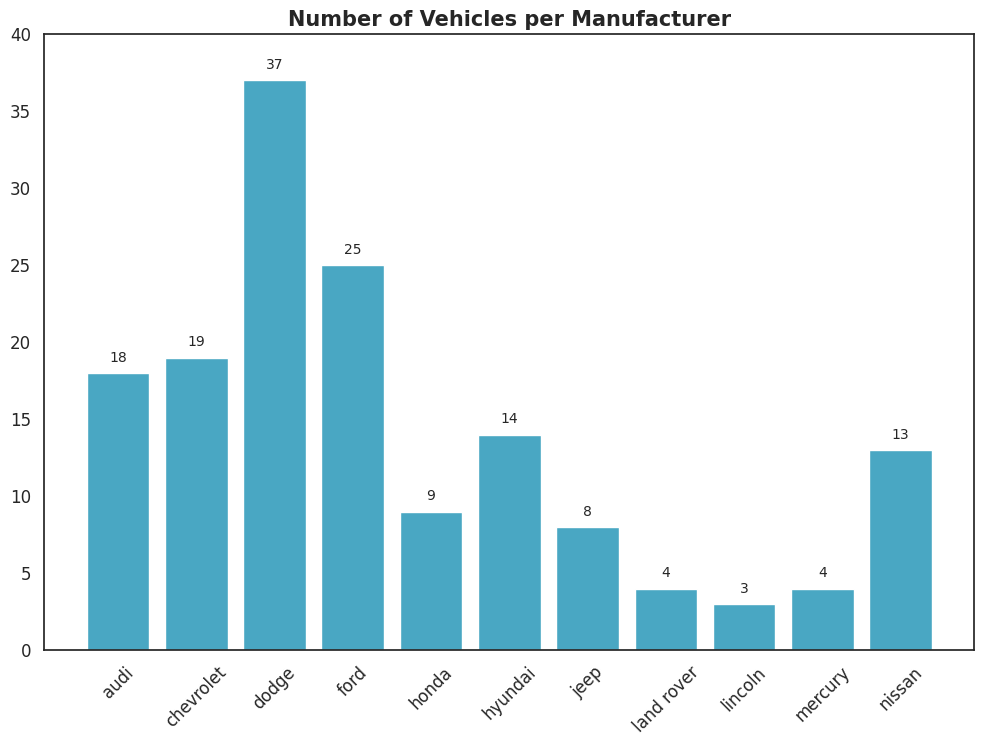

In [82]:
# Vertical bar chart
# prepare data
value_count =  car["manufacturer"].value_counts(sort=False)
value_count = value_count[:11,]


# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(value_count.index, value_count.values, color='#49a7c3') # color=colors to add color

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(value_count.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 1, # where to put the text on the y coordinates
            v, # value to text
            #color=colors[i], # color corresponding to the bar
            fontsize=10, # fontsize
            horizontalalignment='center', # center the text to be more pleasant
            verticalalignment='center'
           )


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_ylim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold')

# 12. Horizontal bar chart 

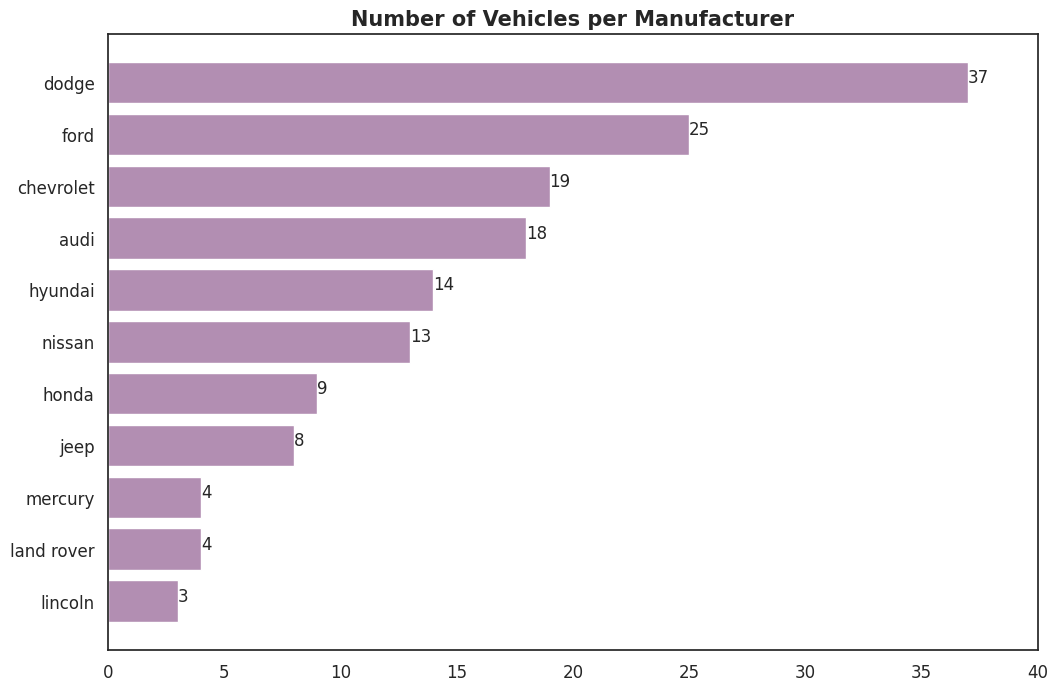

In [83]:
value_count = value_count.sort_values()
# Vertical bar chart
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()


# plot the data using matplotlib
plt.barh(value_count.index, value_count.values, color='#b28eb2')

for index, value in enumerate(value_count.values):
    plt.text(value, index, str(value))


# size of the x and y ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# change the ylim
ax.set_xlim(0, 40)

# set a title for the plot
ax.set_title('Number of Vehicles per Manufacturer', fontsize=15, fontweight='bold');

# 13. Multi-set Bar Chart

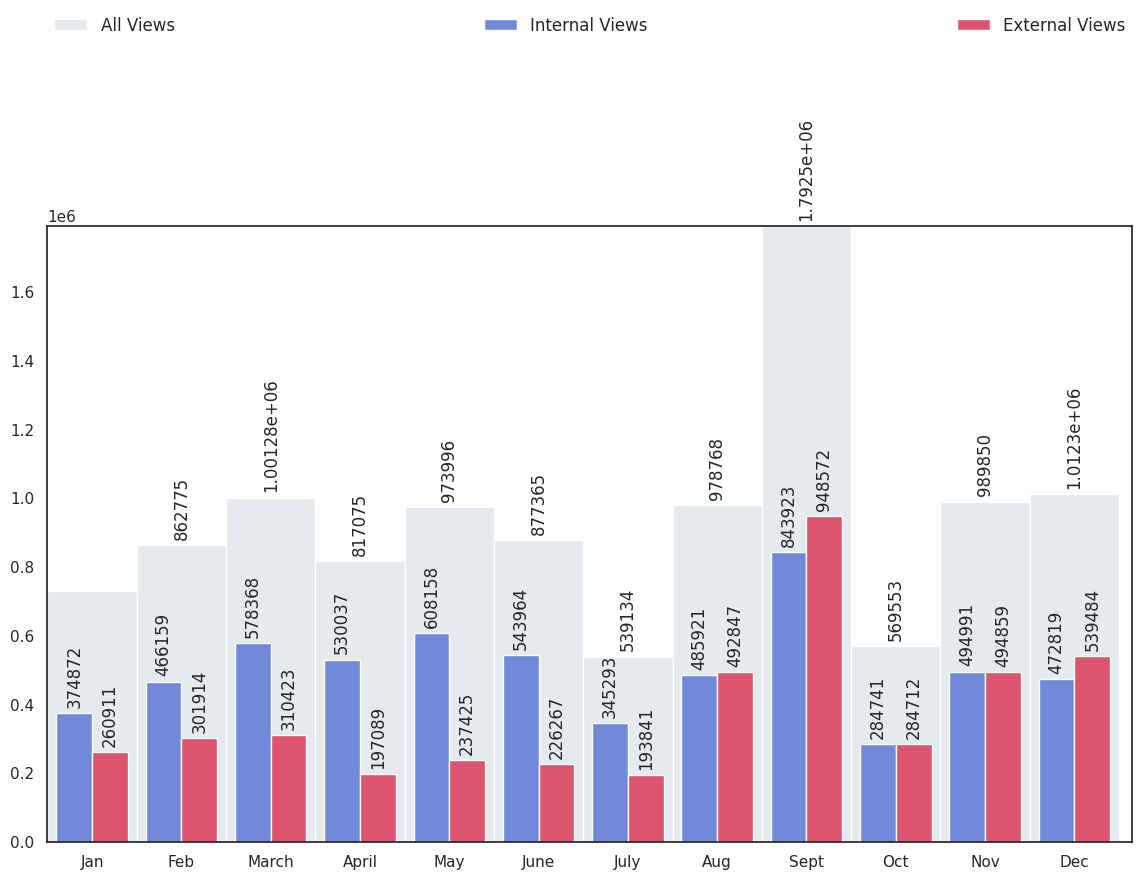

In [84]:
views = pd.DataFrame(data, columns=['Month', 'All Views'])
df = pd.DataFrame(data, 
                  columns=['Month', 'Internal Views', 'External Views'])

# Plotting the bars
ax = views.plot.bar(rot=0,color='#E6E9ED',width=1, figsize=(14,8))
ax = df.plot.bar(rot=0, ax=ax, color=['#7289da', '#dd546e', '#99aab5', '#f3c366'], 
                 width=0.8, figsize=(14,8)) 


for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.3,1,0.8), 
          borderaxespad=0, mode="expand", fontsize=12)
ax.set_xticklabels(df["Month"])
plt.show()

# 14. Stacked bar chart

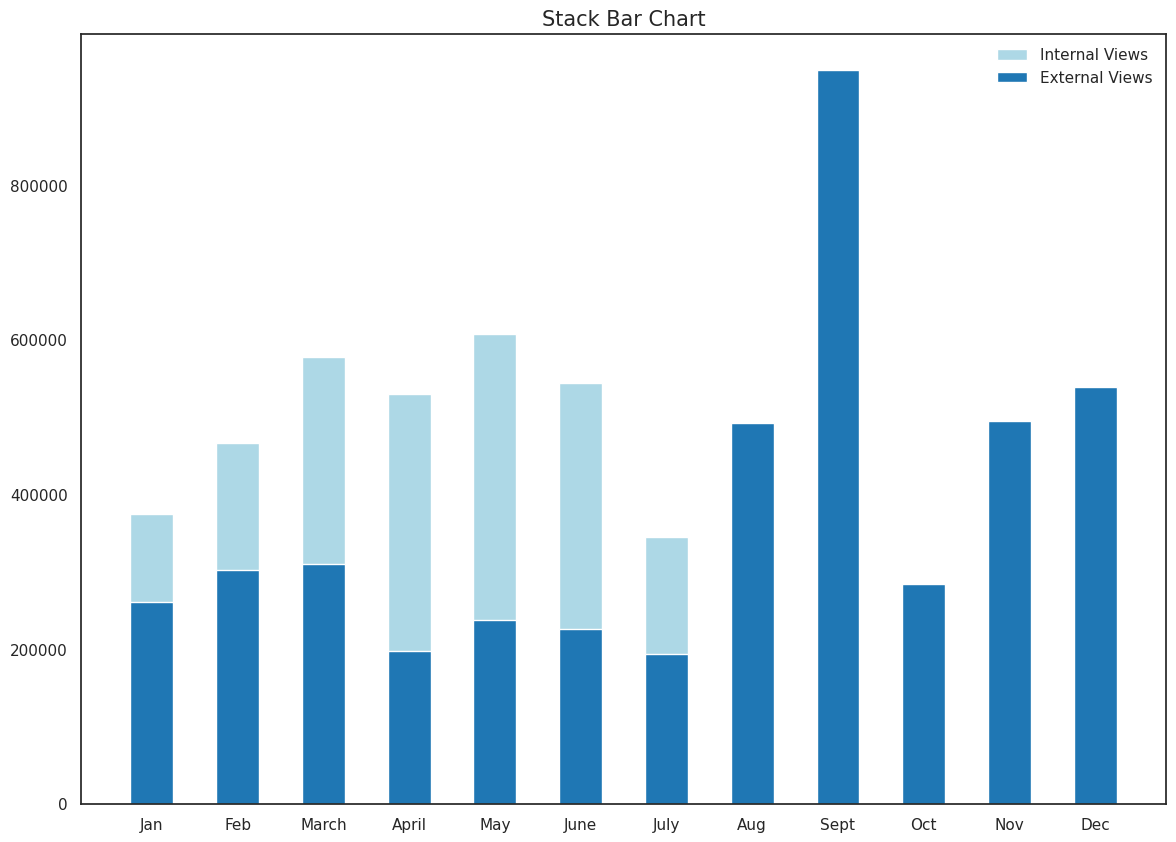

In [85]:
fig = plt.figure(figsize=(14,10))
rect1 = plt.bar(data['Month'] ,data['Internal Views'],
                width=0.5, color='lightblue')
rect2 = plt.bar(data['Month'], data['External Views'],
                width=0.5, color='#1f77b4')

plt.legend((rect1[0], rect2[0]), ('Internal Views', 'External Views'))
plt.title('Stack Bar Chart', fontsize=15)
plt.show()

# Distribution Plot
15. Histogram 
16. Density Curve with Histogram
17. Density Plot
18. Box Plot
19. Strip Plot
20. Violin Plot
21. Population Pyramid

# 15. Histogram

Text(0.5, 1.0, 'Histogram of Happiness Score')

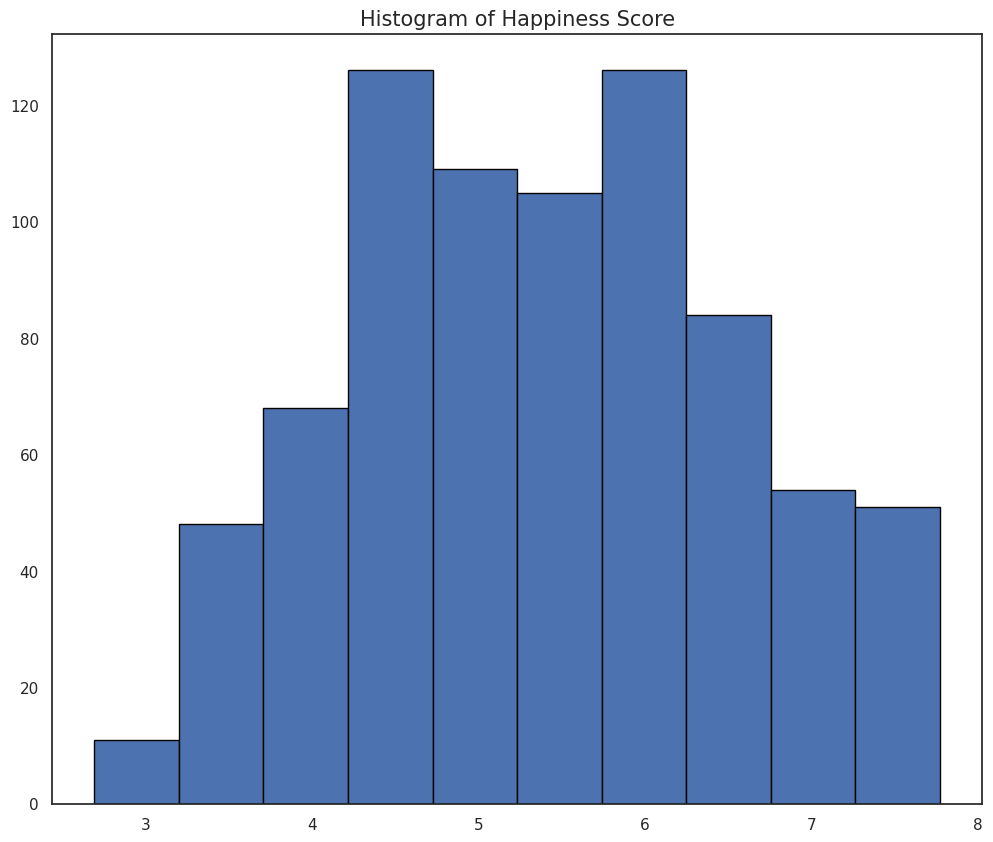

In [86]:
fig = plt.figure(figsize=(12,10))
plt.hist(happy['Score'], edgecolor = 'black')
plt.title('Histogram of Happiness Score', fontsize=15)

# 16. Density Curve with Histogram

/tmp/ipykernel_122078/3685820685.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Density Plot and Histogram of Happiness Score')

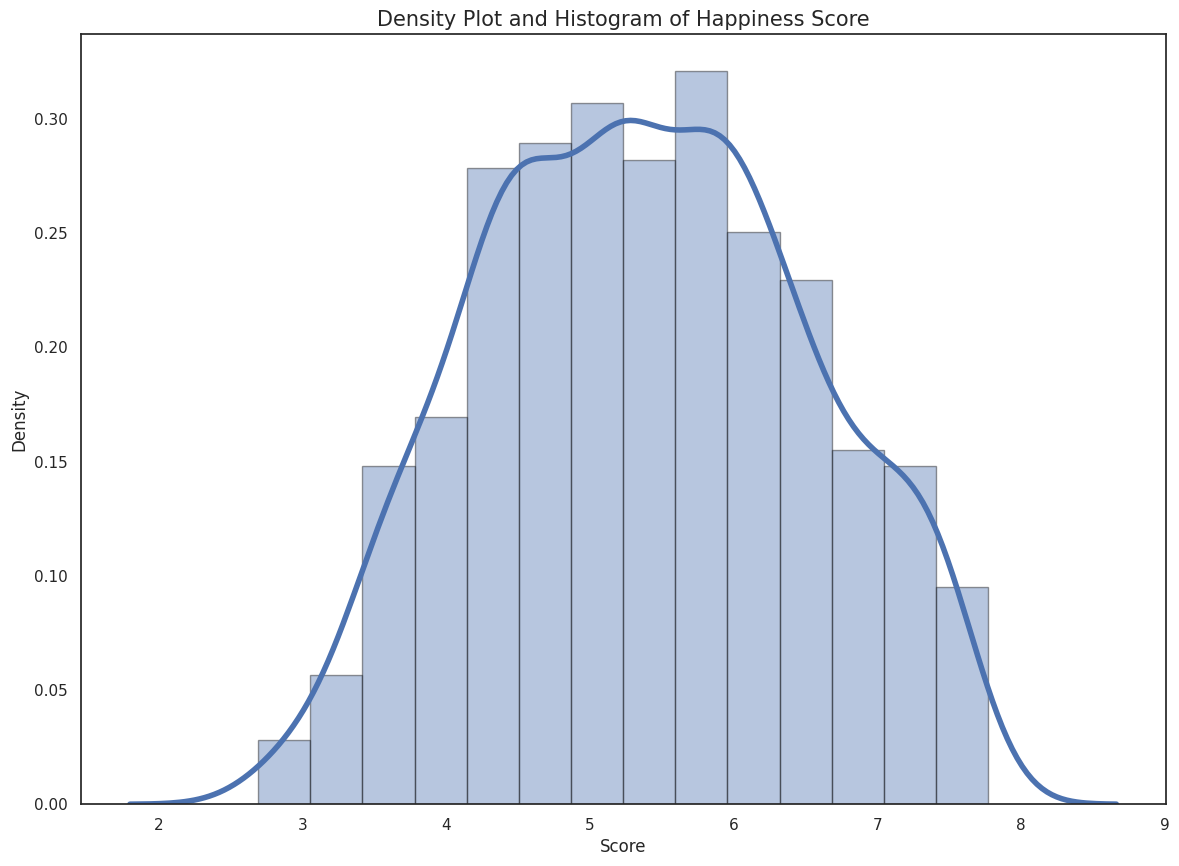

In [87]:
fig = plt.figure(figsize=(14,10))
sns.distplot(happy['Score'], hist=True, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot and Histogram of Happiness Score', fontsize=15)

# 17. Density Plot


/tmp/ipykernel_122078/713627419.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='displ', ylabel='Density'>

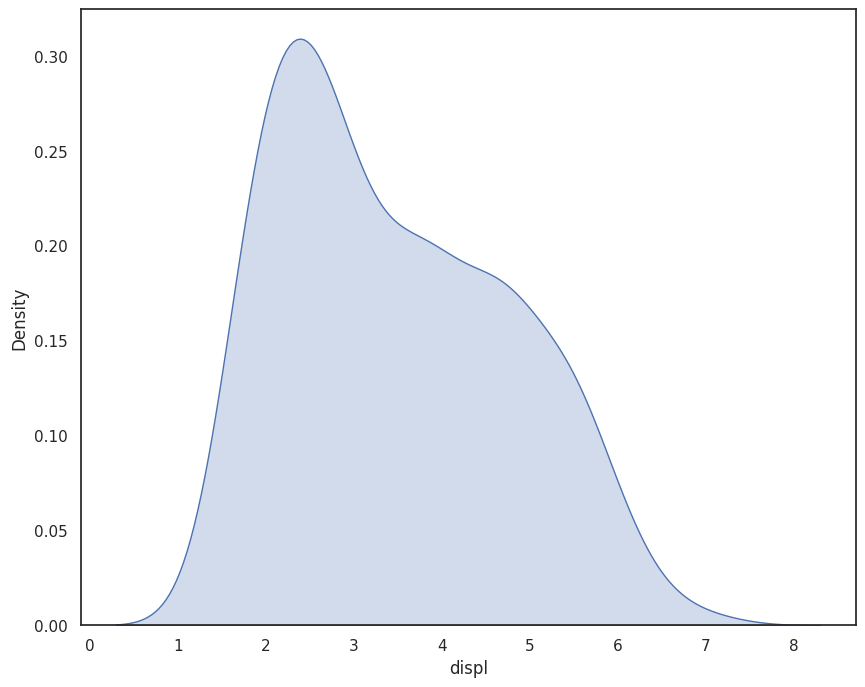

In [88]:
# simple density plot
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
sns.kdeplot(car['displ'], shade=True)

/tmp/ipykernel_122078/665149675.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




/tmp/ipykernel_122078/665149675.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/tmp/ipykernel_122078/665149675.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Density Plot of City Mileage by vehicle type')

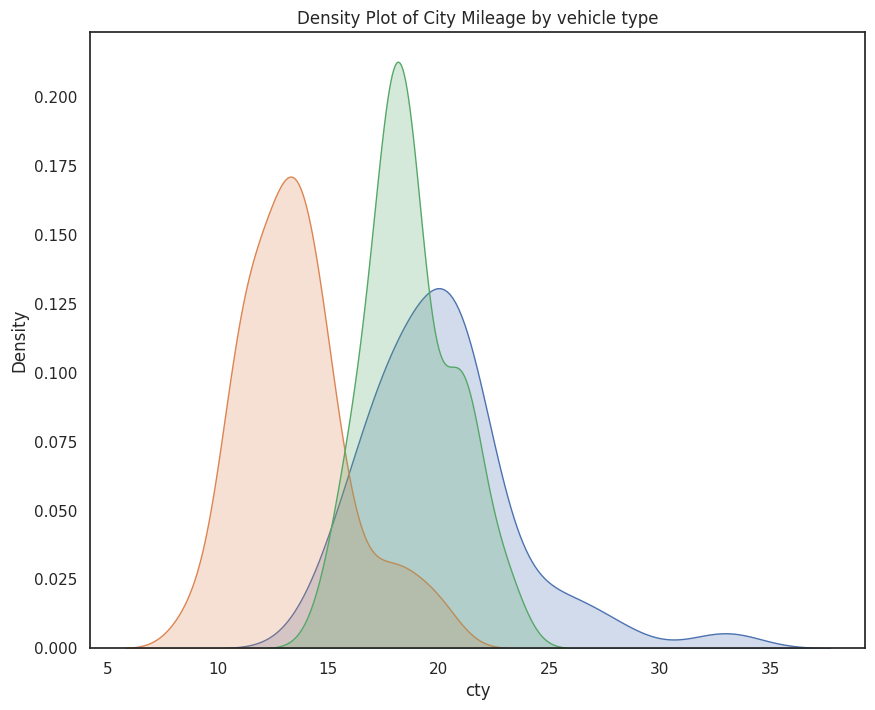

In [89]:
# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for class_ in ['compact', 'suv', 'midsize']:
    # extract the data
    x = car[car['class'] == class_]['cty']
    # plot the data using seaborn
    sns.kdeplot(x, shade=True, label = '{} '.format(class_))

# set the title of the plot
plt.title('Density Plot of City Mileage by vehicle type')

# 18. Box Plot

Text(0.5, 1.0, 'Box plor of Highway Mileage by Vehicle Class')

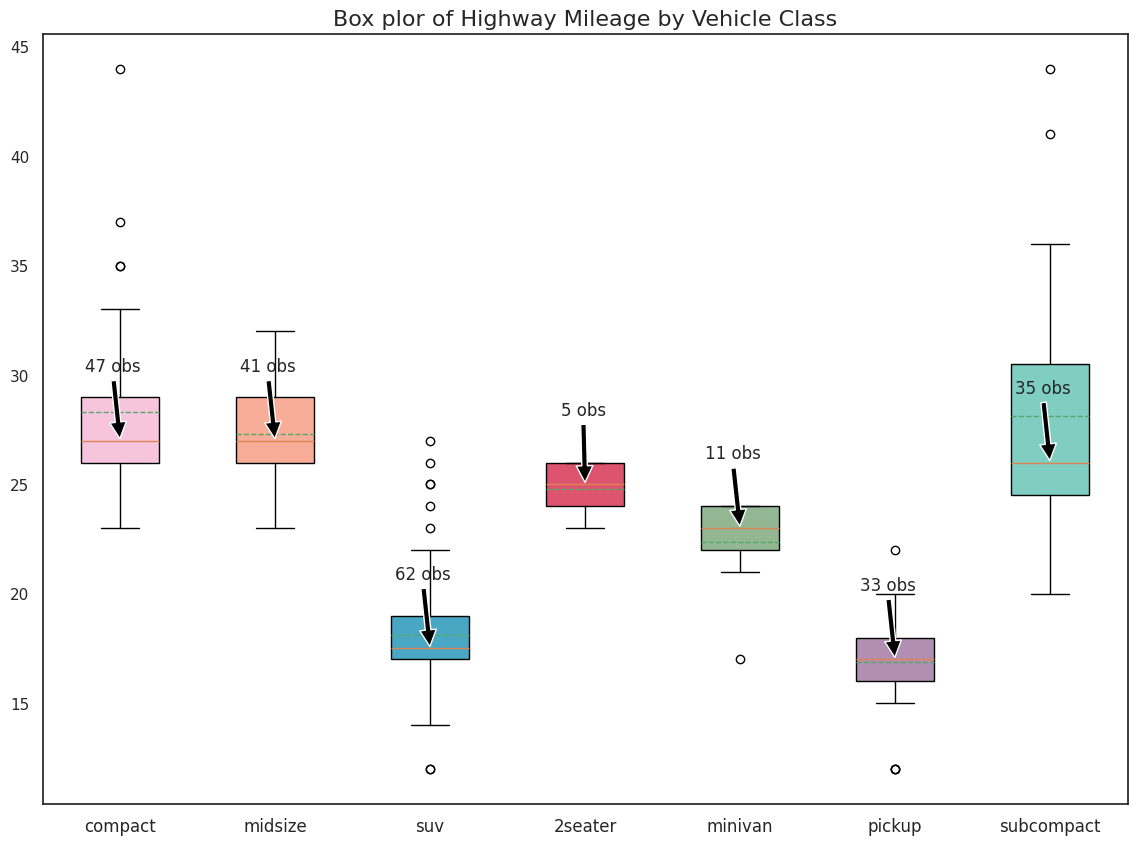

In [90]:
# vectors to plot
vects = [car[car["class"]==cars]["hwy"] for cars in car["class"].unique()]

# labels for the x axis
labels = [class_ for class_ in car["class"].unique()]

# handpicked colors
colors = ['#f6c5dd', '#f7ad97', '#49a7c3', '#dd546e', '#93b793', '#b28eb2', '#80cdc1']



# instanciate the figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# plot the data using matplotlib
plot1 = ax.boxplot(vects,
    notch=False, vert=True,
    meanline=True,showmeans=True,
    patch_artist=True
)

# iterate over every box and add some annotations
for box, color, vect, label, tick in zip(plot1['boxes'], # this line to iterate over every box
                                         colors, vects, labels, ax.get_xticks()):
    # change the color of the box
    box.set(facecolor=color)
    # add text
    ax.annotate("{} obs".format(len(vect)), 
                xy=(tick, np.median(vect)),
               xytext=(15, 60), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.03),
            horizontalalignment='right', verticalalignment='top',
            )


# prettify the plot
# change the x labels
ax.set_xticklabels(labels=labels)

# change the rotation and the size of the x ticks (numbers of x axis)
ax.tick_params(axis='x',labelsize=12)

# set the title for the plot
ax.set_title('Box plor of Highway Mileage by Vehicle Class', fontsize=16)

# 19. Strip Plot 

/tmp/ipykernel_122078/1448692528.py:5: FutureWarning:

Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.



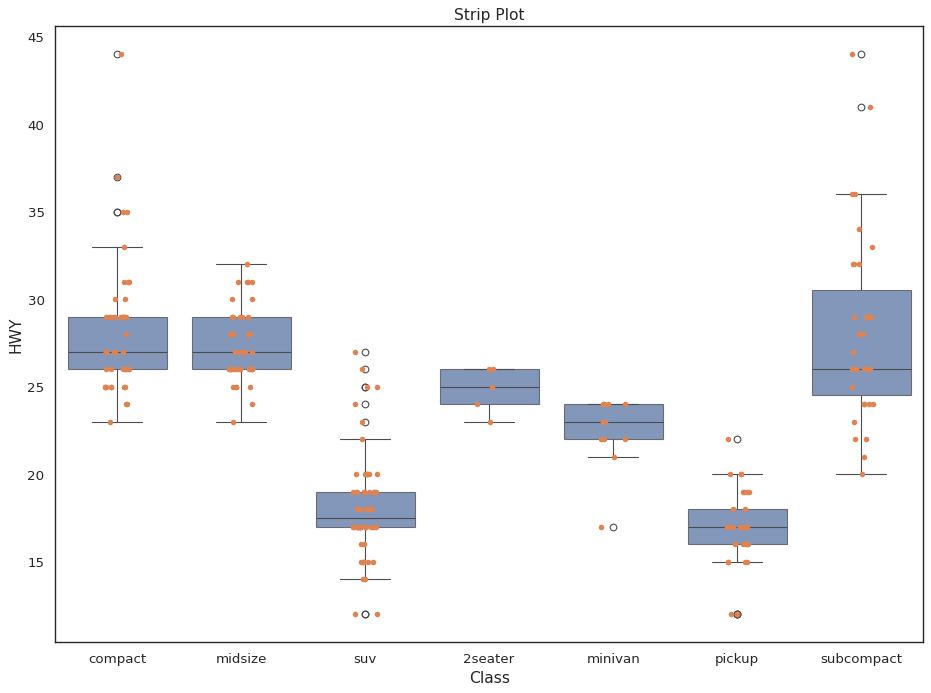

In [91]:
plt.figure(figsize=(14, 10), dpi=80)

# Create boxplot and stripplot
ax = sns.boxplot(data=car, x="class", y="hwy", boxprops=dict(alpha=0.75))
ax = sns.stripplot(data=car, x="class", y="hwy", jitter=True, edgecolor="gray")

# Change the font size of the x and y ticks
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# Set x and y labels
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("HWY", fontsize=14)

# Set title
ax.set_title("Strip Plot", fontsize=14)

plt.show()


# 20. Violin Plot

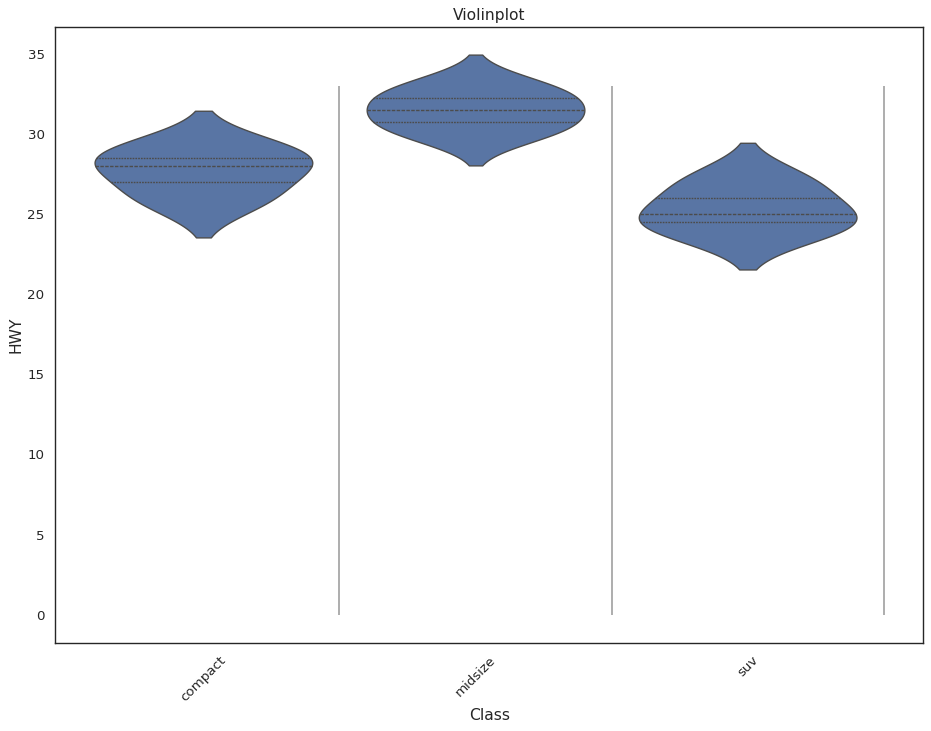

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data (replace this with your actual data loading)
car = pd.DataFrame(
    {
        "class": [
            "compact",
            "midsize",
            "midsize",
            "compact",
            "suv",
            "suv",
            "suv",
            "midsize",
            "compact",
            "midsize",
        ],
        "hwy": [29, 31, 32, 28, 27, 25, 24, 30, 26, 33],
    }
)

plt.figure(figsize=(14, 10), dpi=80)

# Create violin plot with density normalization
sns.violinplot(x=car["class"], y=car["hwy"], density_norm="width", inner="quartile")

# Prettify the plot

# Get the current axes
ax = plt.gca()

# Get the xticks positions
xticks = ax.get_xticks()

# Add vertical lines to separate different classes
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(car["hwy"]), color="grey", alpha=0.75)

# Rotate x and y ticks
ax.tick_params(axis="x", labelsize=12, rotation=45)
ax.tick_params(axis="y", labelsize=12)

# Set x and y labels
ax.set_xlabel("Class", fontsize=14)
ax.set_ylabel("HWY", fontsize=14)

# Set title
ax.set_title("Violinplot", fontsize=14)

plt.show()

# 21. Population Pyramid

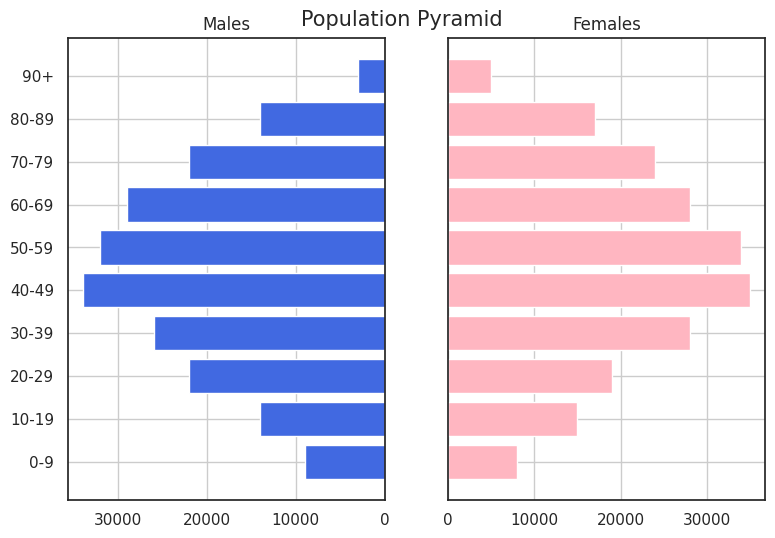

In [93]:
#create dataframe
df = pd.DataFrame({'Age': ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'], 
                    'Male': [9000, 14000, 22000, 26000, 34000, 32000, 29000, 22000, 14000, 3000], 
                    'Female': [8000, 15000, 19000, 28000, 35000, 34000, 28000, 24000, 17000, 5000]})


#define x and y limits
y = range(0, len(df))
x_male = df['Male']
x_female = df['Female']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('white')
plt.figtext(.5,.9,"Population Pyramid ", fontsize=15, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Females')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df['Age'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

# Comparision Plot
22. Bubble Chart
23. Bullet Chart
24. Pie Chart
25. Net Pie Chart
26. Donut Chart
27. TreeMap
28. Diverging Bar
29. Choropleth Map
30. Bubble Map

# 22. Bubble Chart

In [94]:
happy = pd.read_csv('happiness_rank.csv')
'''Happiness score vs gdp per capital'''
px.scatter(happy, x="GDP", y="Score", animation_frame="Year",
           animation_group="Country",
           size="Rank", color="Country", hover_name="Country",
           trendline= "ols")

# 23. Bullet Chart

In [100]:
# Bullet Chart
import plotly.figure_factory as ff

data = (
  {"label": "Happiness", "sublabel":"score",
   "range": [5, 6, 8], "performance": [5.5, 6.5], "point": [7]},
  {"label": "Economy", "sublabel": "score", "range": [0, 1, 2],
   "performance": [1, 1.5], "sublabel":"score","point": [1.5]},
  {"label": "Family","sublabel":"score", "range": [0, 1, 2],
   "performance": [1, 1.5],"sublabel":"score", "point": [1.3]},
  {"label": "Freedom","sublabel":"score", "range": [0, 0.3, 0.6],
   "performance": [0.3, 0.4],"sublabel":"score", "point": [0.5]},
  {"label": "Trust", "sublabel":"score","range": [0, 0.2, 0.5],
   "performance": [0.3, 0.4], "point": [0.4]}
)


fig = ff.create_bullet(
    data, titles='label', subtitles='sublabel', markers='point',
    measures='performance', ranges='range', orientation='h',
    measure_colors=['#1e747c', '#7ac7bf'],
    range_colors=['#F5E1DA', '#F1F1F1']
   )
py.iplot(fig, filename='bullet chart from dict')

# 24. Pie Chart

Text(0.5, 1.0, 'Pie Chart')

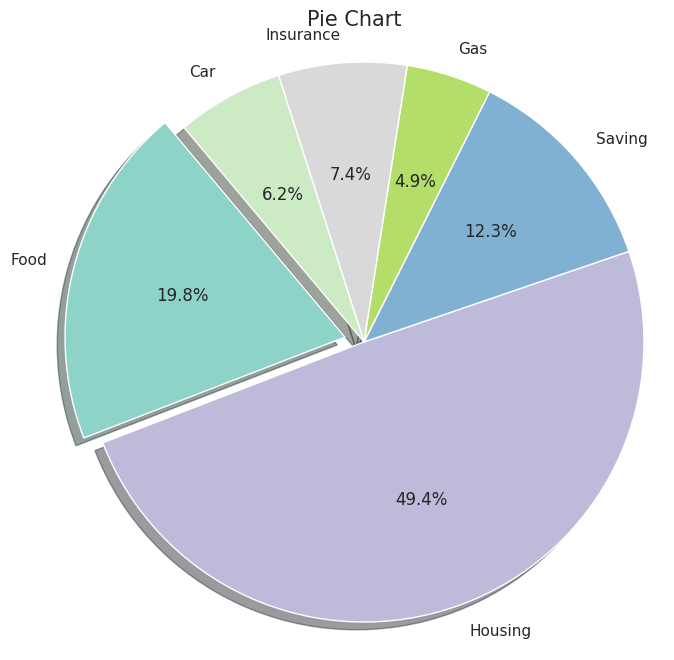

In [101]:
fig = plt.figure(figsize=(8,8))
labels = 'Food', 'Housing', 'Saving', 'Gas', 'Insurance', 'Car'
spend = [800, 2000, 500, 200, 300, 250]

# create n colors based on the number of labels we have
colors = [plt.cm.Set3(i/float(len(labels))) for i in range(len(labels))]
                                                              
p = plt.pie(spend, # Value
            labels=labels, # Labels for each sections
            explode=(0.07, 0, 0, 0, 0, 0), # To slice the perticuler section
            colors=colors, # Color of each section
            autopct='%1.1f%%', # Show data in persentage for with 1 decimal point
            startangle=130, # Start angle of first section
            shadow=True # Showing shadow of pie chart
           )


plt.axis('equal')

plt.title('Pie Chart', fontsize=15)

# 25. Net Pie Chart

Text(0.5, 1.0, 'Nested Pie Chart')

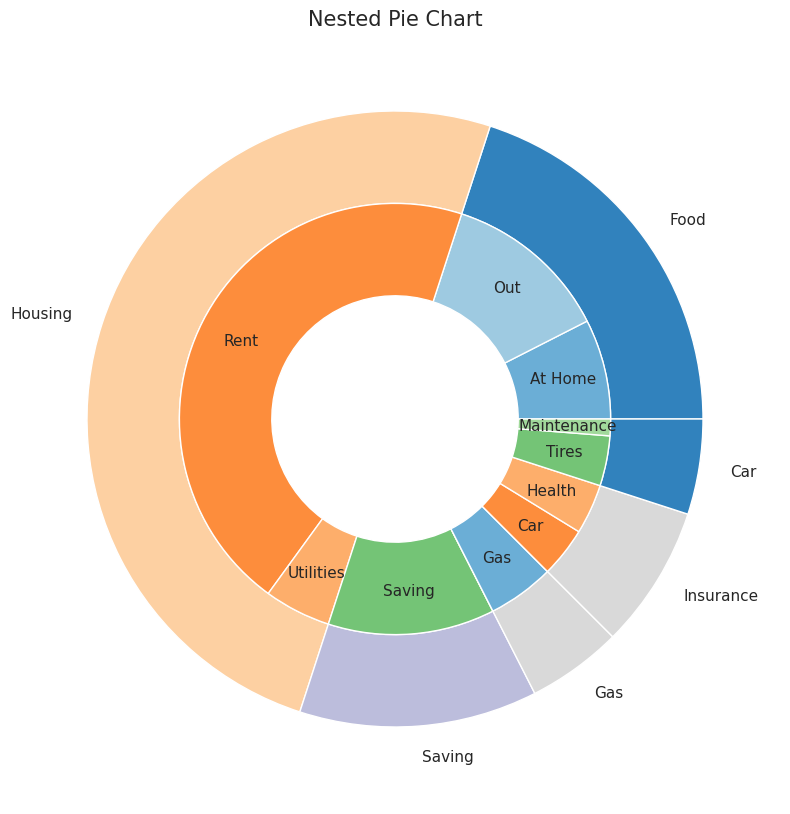

In [97]:
# get the data
size = 0.3
labels = 'Food', 'Housing', 'Saving', 'Gas', 'Insurance', 'Car'
spend = [800, 2000, 500, 200, 300, 250]
vals = np.array([[300., 500.], [1800., 200.], [500., 0.],[200., 0.], [150., 150.],[150., 50]])
in_labels = 'At Home','Out', 'Rent','Utilities','Saving','', 'Gas','','Car','Health','Tires','Maintenance'
# create the outer and inner colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*7)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# instanciate the figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot()

# plot the data
# outer level
ax.pie(vals.sum(axis=1), # plot the total [60., 32.] = 92
       radius=1, # Radius to increase or decrease the size of pie chart 
       labels=labels, # Labels for each sections
       colors=outer_colors, # Color of each section
       wedgeprops=dict(width=size, edgecolor='w') # Add edges to each portion/slice of the pie
      )

# inner level
patches, texts = ax.pie(vals.flatten(), # using flatten we plot 60, 32 separetly
       radius=1-size,
       labels=in_labels,
       labeldistance=0.8,
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

for t in texts:
    t.set_horizontalalignment('center')


# set the title for the plot
plt.title('Nested Pie Chart', fontsize=15)

# 26. Donut Chart

In [98]:
df15 = pd.read_csv('2015.csv')
d2015 = df15['Region'].value_counts()

label_d2015 = d2015.index
size_d2015 = d2015.values


colors = ['#4870a0', '#eb96aa', '#7ac7bf', '#b28eb2', '#d9a3d8',
         '#f3c366','#a1cdec', '#38b6ff','#92406e','#f5907b']

trace = go.Pie( labels=label_d2015,
               values=size_d2015,
               marker=dict(colors = colors),
               name='2015', 
               hole=0.3)

data = [trace]

layout1 = go.Layout(
           title='Regions')

fig = go.Figure(data=data, layout=layout1)

py.iplot(fig)

# 27. Tree Map

In [99]:
import squarify

# prepare the data for plotting
# get the values
label_value = car['class'].value_counts().to_dict()

# create the labels using a list comprehesion
labels = ['{} has {} obs'.format(class_, obs) for class_, obs in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]


# instanciate the figure
fig = plt.gcf()
fig.set_size_inches(16,8)

# plot the data using squarify
squarify.plot(sizes=label_value.values(), label=labels, color=colors, alpha=0.6)

# prettify the plot
# add a title to the plot
plt.title('Treemap Using External Libraries', fontsize=25, fontweight='bold')

ModuleNotFoundError: No module named 'squarify'

# 28. Diverging Bar Chart

([<matplotlib.axis.YTick at 0x7f9bb0aee730>,
 [Text(0, 0, 'Boston'),
  Text(0, 1, 'Pittsburgh'),
  Text(0, 2, 'Minneapolis'),
  Text(0, 3, 'Baltimore'),
  Text(0, 4, 'Philadelphia'),
  Text(0, 5, 'St. Louis'),
  Text(0, 6, 'San Francisco'),
  Text(0, 7, 'Detroit'),
  Text(0, 8, 'Washington, D.C.'),
  Text(0, 9, 'Seattle'),
  Text(0, 10, 'New York'),
  Text(0, 11, 'Portland'),
  Text(0, 12, 'Denver'),
  Text(0, 13, 'Chicago'),
  Text(0, 14, 'All Metro Areas'),
  Text(0, 15, 'Charlotte'),
  Text(0, 16, 'San Diego'),
  Text(0, 17, 'Phoenix'),
  Text(0, 18, 'Tampa'),
  Text(0, 19, 'Atlanta'),
  Text(0, 20, 'Riverside, Calif.'),
  Text(0, 21, 'San Antonio'),
  Text(0, 22, 'Los Angeles'),
  Text(0, 23, 'Dallas'),
  Text(0, 24, 'Houston'),
  Text(0, 25, 'Miami')])

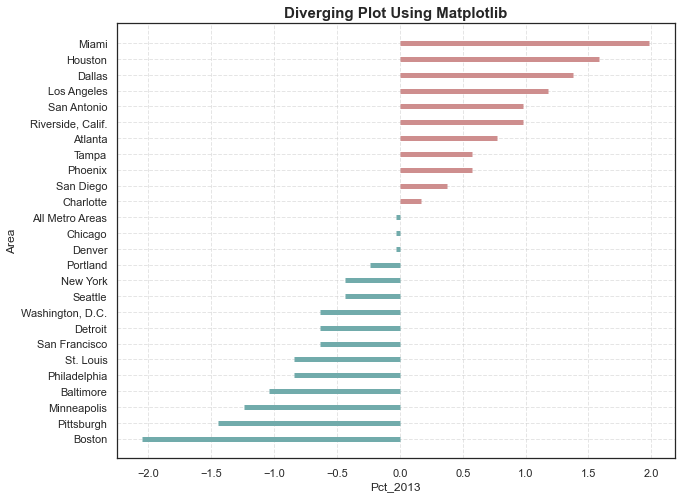

In [ ]:
health = pd.read_csv('health.csv')
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
health['x_plot'] = (health['pct_2013'] - health['pct_2013'].mean())/health['pct_2013'].std()

# sort value and reset the index
health.sort_values('x_plot', inplace = True)
health.reset_index(inplace = True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ['#71abab' if x < 0 else '#ce8e8e' for x in health['x_plot']]

# instanciate the figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
# plot using horizontal lines and make it look like a column by changing the linewidth
ax.hlines(y=health.index, xmin=0 , xmax=health['x_plot'],  color=colors, linewidth=5)

# prettify the plot
# set x and y axis
ax.set_xlabel('Pct_2013')
ax.set_ylabel('Area')

# set a title
ax.set_title('Diverging Plot Using Matplotlib', fontsize=15, fontweight='bold')

# make a grid to help separate the lines
ax.grid(linestyle='--', alpha=0.5)

# change the y ticks
# first you set the yticks
# then you change them using the area names

plt.yticks(health.index, health.Area)


# 29. World Map

In [ ]:
'''World Map
Happiness Rank Accross the World'''

happiness_rank = dict(type='choropleth', 
           locations=happy['Country'],
           locationmode='country names',
           z=happy['Rank'], 
           text=happy['Country'],
           colorscale='bluyl',
           autocolorscale=False,
           reversescale=True,
           marker_line_color='darkgray',
           marker_line_width=0.5)
layout = dict(title='Happiness Rank Across the World', 
             geo=dict(showframe=False, 
                       projection={'type': 'equirectangular'}))
world_map_1 = go.Figure(data=[happiness_rank], layout=layout)
iplot(world_map_1)

# 30. Bubble Map

In [ ]:
# to use unverified ssl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
covid.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  03/09/2020    3      9  2020     38       3             Afghanistan    AF   
1  02/09/2020    2      9  2020      9       0             Afghanistan    AF   
2  01/09/2020    1      9  2020     34       4             Afghanistan    AF   
3  31/08/2020   31      8  2020     19       0             Afghanistan    AF   
4  30/08/2020   30      8  2020      3       0             Afghanistan    AF   
5  29/08/2020   29      8  2020     11       1             Afghanistan    AF   
6  28/08/2020   28      8  2020      3       0             Afghanistan    AF   
7  27/08/2020   27      8  2020     55       4             Afghanistan    AF   
8  26/08/2020   26      8  2020      1       0             Afghanistan    AF   
9  25/08/2020   25      8  2020     71      10             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.272286           
1                                           1.592986           
2                                           1.569328           
3                                           1.487839           
4                                           1.556185           
5                                           1.863741           
6                                           1.853227           
7                                           2.053007           
8                                           2.108210           
9                                           2.670749

In [ ]:
# Remove unuseful columns
covid = covid[['dateRep', 'cases', 'deaths', 'countriesAndTerritories', 'countryterritoryCode', 'continentExp']]
# Rename columns
covid = covid.rename(columns={
    'dateRep': 'date',
    'countriesAndTerritories': 'country',
    'countryterritoryCode': 'countryCode',
    'continentExp': 'continent'
})
# Convert string to datetime
covid['date'] = pd.to_datetime(covid['date'], format='%d/%m/%Y')
# Preview the data frame
covid.sample(10)

date  cases  deaths      country countryCode continent
26975 2020-06-25      0       0    Nicaragua         NIC   America
34080 2020-08-07     20       1  South_Korea         KOR      Asia
37725 2020-04-18      0       0       Uganda         UGA    Africa
317   2020-06-16     69       0      Albania         ALB    Europe
16775 2020-06-06      0       0     Holy_See         VAT    Europe
11121 2020-04-29   1018     208      Ecuador         ECU   America
13375 2020-07-16    927      91       France         FRA    Europe
4614  2020-07-27   1148      48      Bolivia         BOL   America
15013 2020-06-04      0       0       Greece         GRC    Europe
35626 2020-05-28      0       0  Switzerland         CHE    Europe

In [ ]:
from datetime import datetime
# Get today as string
today = datetime.now().strftime('%Y-%m-%d')
# Get a data frame only for today
df_today = covid[covid.date == today]
# Preview the data frame
df_today.head()

date  cases  deaths      country countryCode continent
0   2020-09-03     38       3  Afghanistan         AFG      Asia
238 2020-09-03    122       6      Albania         ALB    Europe
417 2020-09-03    325       7      Algeria         DZA    Africa
660 2020-09-03     15       0      Andorra         AND    Europe
834 2020-09-03     75       1       Angola         AGO    Africa

In [ ]:
import plotly.express as px
fig = px.scatter_geo(
    df_today, # provide the Pandas data frame
    locations='countryCode', # indicate locations
    color='continent',
    hover_name='country', # what to display when the mouse hovering on the bubble
    size='cases', # how large the bubble is
    projection='equirectangular',
    title=f'World COVID-19 Cases for {today}'
)
fig.show()